In [0]:
from fastai.collab import *
from fastai.tabular import *

In [0]:
user, item, title = 'userId', 'movieId', 'title'

In [3]:
path = untar_data(URLs.ML_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/movie_lens_sample/ratings.csv')]

In [4]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [0]:
y_range = [0, 5.5]

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


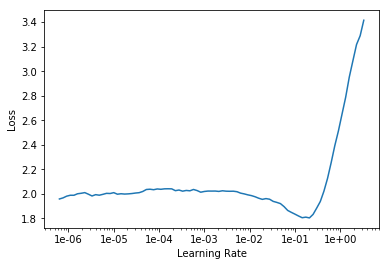

In [9]:
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(3, 2e-2)

epoch,train_loss,valid_loss,time
0,1.169489,0.827423,00:00
1,0.722716,0.675814,00:00
2,0.407933,0.660597,00:00


In [0]:
!curl http://files.grouplens.org/datasets/movielens/ml-100k.zip -o ml-100k.zip
!unzip ml-100k.zip -d sample_data/
!rm -rf ml-100k.zip

In [16]:
path = Path('sample_data/ml-100k')
path.ls()

[PosixPath('sample_data/ml-100k/allbut.pl'),
 PosixPath('sample_data/ml-100k/mku.sh'),
 PosixPath('sample_data/ml-100k/u.info'),
 PosixPath('sample_data/ml-100k/u3.test'),
 PosixPath('sample_data/ml-100k/ub.test'),
 PosixPath('sample_data/ml-100k/u.data'),
 PosixPath('sample_data/ml-100k/u1.base'),
 PosixPath('sample_data/ml-100k/ub.base'),
 PosixPath('sample_data/ml-100k/u.genre'),
 PosixPath('sample_data/ml-100k/u2.test'),
 PosixPath('sample_data/ml-100k/u4.test'),
 PosixPath('sample_data/ml-100k/u1.test'),
 PosixPath('sample_data/ml-100k/u.user'),
 PosixPath('sample_data/ml-100k/u5.test'),
 PosixPath('sample_data/ml-100k/u.occupation'),
 PosixPath('sample_data/ml-100k/u3.base'),
 PosixPath('sample_data/ml-100k/ua.test'),
 PosixPath('sample_data/ml-100k/README'),
 PosixPath('sample_data/ml-100k/u4.base'),
 PosixPath('sample_data/ml-100k/u.item'),
 PosixPath('sample_data/ml-100k/u5.base'),
 PosixPath('sample_data/ml-100k/ua.base'),
 PosixPath('sample_data/ml-100k/u2.base')]

In [14]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None, names=[user, item, 'rating', 'timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [24]:
movies = pd.read_csv(path/'u.item', delimiter='|', encoding='latin-1', header=None, 
                     names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
len(ratings), len(movies)

(100000, 1682)

In [26]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

In [28]:
data.show_batch()

userId,title,target
437,Rebecca (1940),5.0
875,U Turn (1997),4.0
377,Contact (1997),4.0
668,Boogie Nights (1997),4.0
299,"Celluloid Closet, The (1995)",4.0


In [0]:
y = [0, 5.5]

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range, wd=1e-1)

In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


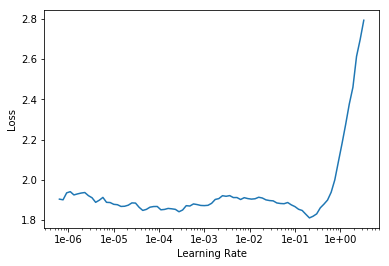

In [38]:
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,time
0,0.947945,0.966105,00:12
1,0.841166,0.878163,00:13
2,0.793820,0.838836,00:13
3,0.695898,0.819128,00:13
4,0.649613,0.817684,00:13


In [0]:
learn.save('dotprod')

In [0]:
learn.load('dotprod');

In [42]:
print(learn.model)

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1654, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)


In [44]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

In [45]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i, b in zip(top_movies, movie_bias)]

In [0]:
item0 = lambda o:o[0]

In [48]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.2751),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.2285), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2282),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2092), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.1956), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.1949), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.1892), 'Grease 2 (1982)', 2.0),
 (tensor(-0.1800), 'Thinner (1996)', 2.4489795918367347),
 (tensor(-0.1794), 'Home Alone 3 (1997)', 1.894736842105263),
 (tensor(-0.1734), 'Beverly Hills Ninja (1997)', 2.3125),
 (tensor(-0.1722), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.1707), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.1690), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.1684), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.1641), 'Halloween: The Curse of Michael Myers

In [49]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.5277), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.4765), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.4676), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.4663), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.4554), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.4243), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.4166), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.4163), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4057), 'Apt Pupil (1998)', 4.1),
 (tensor(0.3934), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.3838), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.3738), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.3705), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.3674), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.3580), 'Boot, Das (1981)', 4.203980099502488)]

In [50]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 50])

In [51]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [0]:
fac0, fac1, fac2 = movie_pca.t()
movie_comp = [(f, i) for f, i in zip(fac0, top_movies)]

In [54]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2390), 'Wrong Trousers, The (1993)'),
 (tensor(1.2090), 'Close Shave, A (1995)'),
 (tensor(1.1601), 'Casablanca (1942)'),
 (tensor(1.0647), 'Lawrence of Arabia (1962)'),
 (tensor(1.0170), 'Chinatown (1974)'),
 (tensor(1.0011), 'Manchurian Candidate, The (1962)'),
 (tensor(1.0004),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(0.9961), 'North by Northwest (1959)'),
 (tensor(0.9748), 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (tensor(0.9725), 'When We Were Kings (1996)')]

In [55]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.3404), "McHale's Navy (1997)"),
 (tensor(-1.3161), 'Jungle2Jungle (1997)'),
 (tensor(-1.3093), 'Children of the Corn: The Gathering (1996)'),
 (tensor(-1.2699), 'Home Alone 3 (1997)'),
 (tensor(-1.2619), 'Leave It to Beaver (1997)'),
 (tensor(-1.1900), 'D3: The Mighty Ducks (1996)'),
 (tensor(-1.1838), 'Bio-Dome (1996)'),
 (tensor(-1.1814), 'Grease 2 (1982)'),
 (tensor(-1.0784), 'Free Willy 3: The Rescue (1997)'),
 (tensor(-1.0660), 'Batman & Robin (1997)')]

In [0]:
movie_comp = [(f, i) for f, i in zip(fac1, top_movies)]

In [57]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1908), 'Braveheart (1995)'),
 (tensor(1.0926), 'Raiders of the Lost Ark (1981)'),
 (tensor(1.0038), 'Titanic (1997)'),
 (tensor(0.8739), 'Independence Day (ID4) (1996)'),
 (tensor(0.8681), 'Air Force One (1997)'),
 (tensor(0.8444), 'Terminator 2: Judgment Day (1991)'),
 (tensor(0.8330), "It's a Wonderful Life (1946)"),
 (tensor(0.8285), 'Return of the Jedi (1983)'),
 (tensor(0.8144), 'Forrest Gump (1994)'),
 (tensor(0.8124), 'Indiana Jones and the Last Crusade (1989)')]

In [58]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.8343), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-0.7918), 'Keys to Tulsa (1997)'),
 (tensor(-0.7415), 'Big Night (1996)'),
 (tensor(-0.7276), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(-0.7270), 'Clockwork Orange, A (1971)'),
 (tensor(-0.7237), 'Jude (1996)'),
 (tensor(-0.7201), 'Trainspotting (1996)'),
 (tensor(-0.7126), 'Cable Guy, The (1996)'),
 (tensor(-0.6962), 'Serial Mom (1994)'),
 (tensor(-0.6943), 'Crow: City of Angels, The (1996)')]

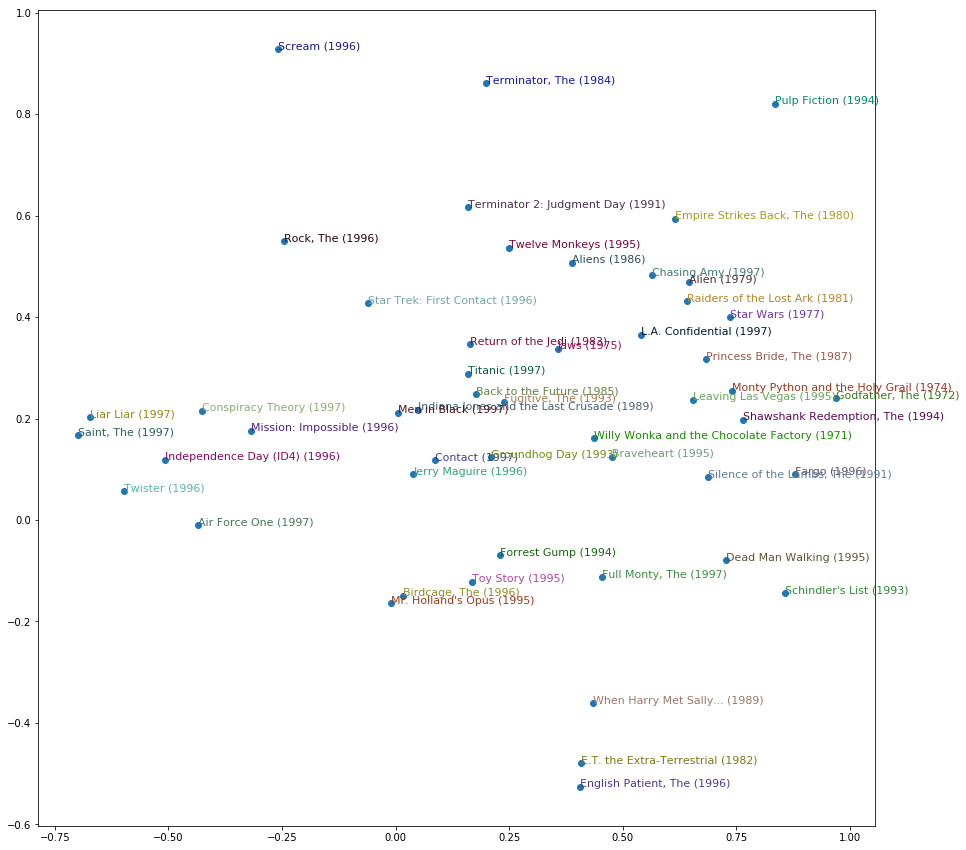

In [59]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15, 15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x, y, i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()